# Conceptual exercises

## Exercise 2

Suppose that we have four observations, for which we compute a dissimilarity matrix

![image_exercise_2.png](../images/exercise_2.png)

- (a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.
- (b) Repeat (a), this time using single linkage clustering.
- (c) Suppose that we cut the dendogram obtained in (a) such that two clusters result. Which observations are in each cluster?
- (d) Suppose that we cut the dendogram obtained in (b) such that two clusters result. Which observations are in each cluster?
- (e) It is mentioned in the chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

### Answer

We can give the function linkage from scipy the upper diagonal of the dissimilarity matrix as input: 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import cut_tree, dendrogram, linkage
import pandas as pd

%matplotlib inline

Dissimilarity upper diagonal values: [0.3  0.4  0.7  0.5  0.8  0.45]


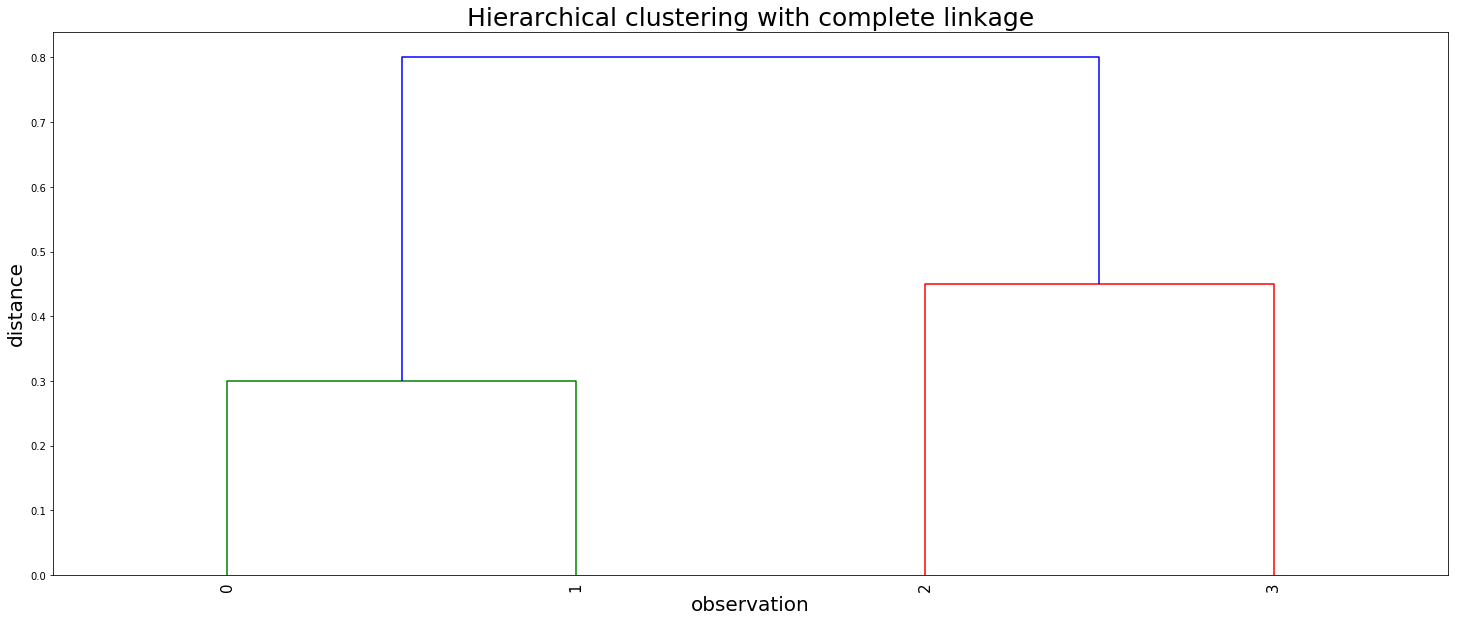

In [4]:
# Create and print dissimilarity vector
dis_vector = np.array([0.3, 0.4, 0.7, 0.5, 0.8, 0.45])
print('Dissimilarity upper diagonal values: ' +  str(dis_vector))

# Compute hierarchical clustering with complete linkage
hc_complete = linkage(dis_vector, method='complete')

# Plot dendrogram 
plt.figure(figsize=(25, 10))
plt.title('Hierarchical clustering with complete linkage', size=25)
plt.xlabel('observation', size=20)
plt.ylabel('distance', size=20)
dendrogram(hc_complete,
           leaf_rotation=90., 
           leaf_font_size=15)
plt.show()

(b) Let's repeat the same process using single linkage:

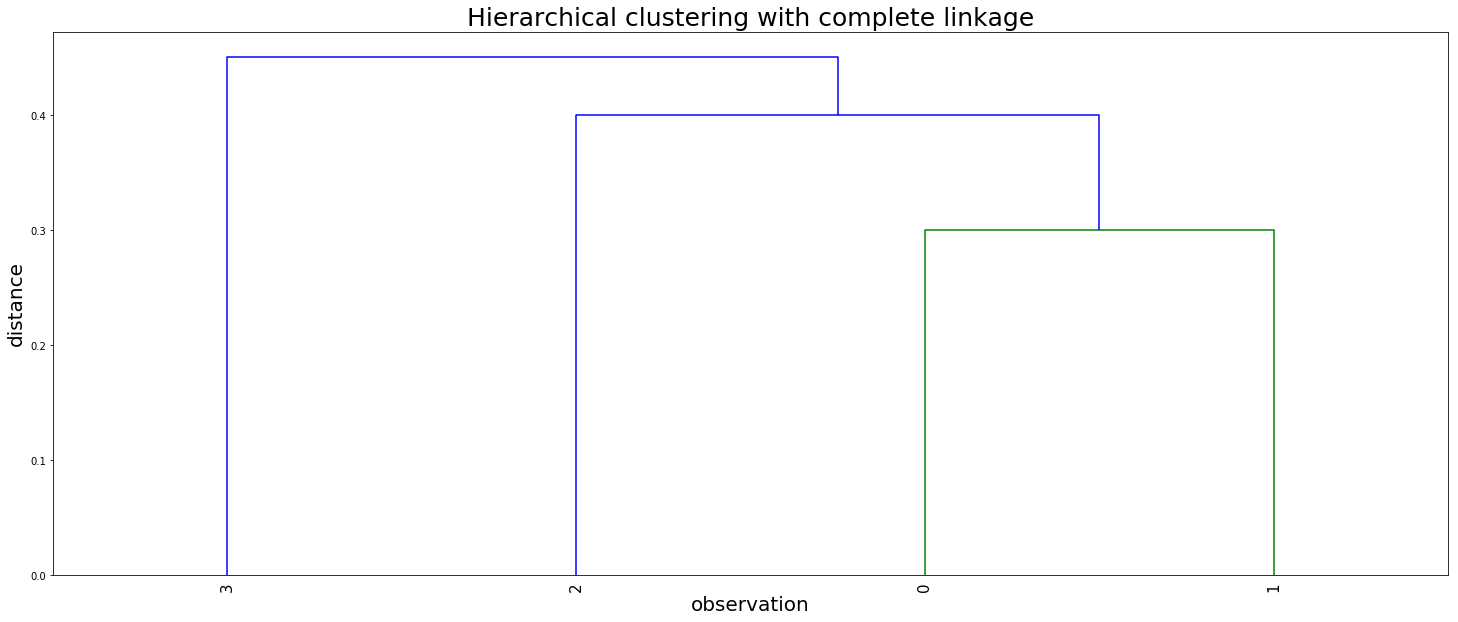

In [5]:
# Compute hierarchical clustering with single linkage
hc_single = linkage(dis_vector, method='single')

# Plot dendrogram 
plt.figure(figsize=(25, 10))
plt.title('Hierarchical clustering with complete linkage', size=25)
plt.xlabel('observation', size=20)
plt.ylabel('distance', size=20)
dendrogram(hc_single,
           leaf_rotation=90., 
           leaf_font_size=15)
plt.show()

(c) and (d) Let's compare how each observation corresponds to each cluster if we cut both trees at cluster = 2:

In [6]:
# Cut tree at n_clusters = 2 for each method
clusters_complete = cut_tree(hc_complete, n_clusters=2)
clusters_single = cut_tree(hc_single, n_clusters=2)

# Display which observations belong to which clusters
clusters = np.append(clusters_complete, clusters_single, axis=1)

clusters_df = pd.DataFrame(clusters,
                             columns = ['Cluster - complete method', 'Cluster - single method']
                             )

print(clusters_df)

   Cluster - complete method  Cluster - single method
0                          0                        0
1                          0                        0
2                          1                        0
3                          1                        1


## Exercise 3

In this problem, you will perform K-means clustering manually, with K = 2, on a small example with n = 6 observations and p = 2 features. The observations are as follows.

![image_exercise_3.png](../images/exercise_3.png)

- (a) Plot the observations.
- (b) Randomly assign a cluster label to each observation. You can use the sample() command in R to do this. Report the cluster labels for each observation.
- (c) Compute the centroid for each cluster.
- (d) Assign each observation to the centroid to which it is closest, in terms of Euclidean distance. Report the cluster labels for each observation.
- (e) Repeat (c) and (d) until the answers obtained stop changing.
- (f) In your plot from (a), color the observations according to the cluster labels obtained.

### Answer

(a) Let's construct the matrix and plot the observations:

In [7]:
import seaborn as sns

   X1  X2
0   1   4
1   1   3
2   0   4
3   5   1
4   6   2
5   4   0


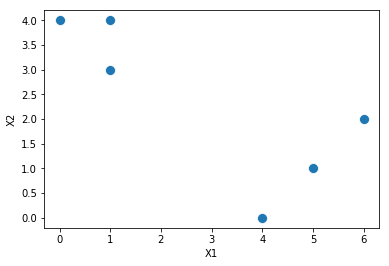

In [8]:
# Construct matrix
data = np.array([[1, 4], [1, 3], [0, 4], [5, 1], [6, 2], [4, 0]])

df = pd.DataFrame(data,
                  columns=['X1', 'X2'])
print(df)

# Plot observations
sns.scatterplot(df.iloc[:,0], df.iloc[:,1],
                s=100);

(b) Let's randomly assign a cluster label to each observation:

In [9]:
# Define and shuffle labels
labels = np.array([[1,2,2,1,1,2]])

random_cluster = np.concatenate((data, labels.T), axis=1)

# 
random_clusters_df = pd.DataFrame(random_cluster,
                      columns=['X1', 'X2', 'Cluster'])
print(random_clusters_df)

   X1  X2  Cluster
0   1   4        1
1   1   3        2
2   0   4        2
3   5   1        1
4   6   2        1
5   4   0        2


(c) Let's compute the centroid for each cluster:

In [10]:
# Compute centroid of each cluster
mean_cluster = random_clusters_df.groupby('Cluster').mean()
centroid_array = np.array(mean_cluster)
print(mean_cluster)

               X1        X2
Cluster                    
1        4.000000  2.333333
2        1.666667  2.333333


(d) Let's assign each observation to the centroid to which it is closest:

In [11]:
from scipy.spatial.distance import euclidean

In [12]:
new_cluster_labels = np.zeros((6,1))

for i in range(len(data)):
    
    # compute euclidean distance
    distance_cluster1 = euclidean(data[i,:], centroid_array[0,:])
    distance_cluster2 = euclidean(data[i,:], centroid_array[1,:])    
    
    # assign clusters
    if distance_cluster1 > distance_cluster2:
        new_cluster_labels[i] = 2
    else:
        new_cluster_labels[i] = 1

print(new_cluster_labels)

[[2.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]]


(e) Let's create a loop that iterates over (c) and (d) until the answers stop changing

In [13]:
new_labels = np.zeros((6,1))

while np.sum(labels - new_labels.T) != 0:
    
    for i in range(len(data)):
        distance_cluster1 = euclidean(data[i,:], centroid_array[0,:])
        distance_cluster2 = euclidean(data[i,:], centroid_array[1,:])    

        if distance_cluster1 > distance_cluster2:
            new_labels[i] = 2
        else:
            new_labels[i] = 1
    
    # convert labels to integers
    new_labels = new_labels.astype(int)
    
    # create df with new clusters and re-compute centroids
    random_clusters_df['Cluster'] = new_labels 
    mean_cluster = random_clusters_df.groupby('Cluster').mean()
    centroid_array = np.array(mean_cluster)

print(random_clusters_df)


   X1  X2  Cluster
0   1   4        2
1   1   3        2
2   0   4        2
3   5   1        1
4   6   2        1
5   4   0        1


(f) Let's plot the labels obtained:

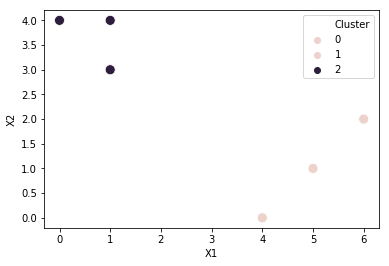

In [14]:
# Plot clusters
sns.scatterplot(df.iloc[:,0], df.iloc[:,1],
                s=100,
                hue=random_clusters_df['Cluster']);